### Using TensorFlow to solve a Linear Regression problem
y = weight * x + bias

This is from https://github.com/dhirajk100/LRTF2/blob/master/LR%20with%20TF%20%20Dhiraj.ipynb

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

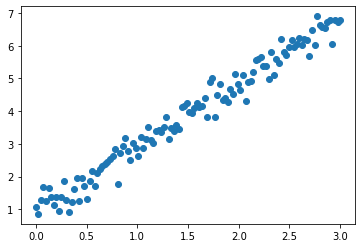

In [3]:
plt.scatter(x,y, label="input data set")

In [4]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

In [5]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [6]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 667.5782470703125
Epoch count 1: Loss value: 10.35215950012207
Epoch count 2: Loss value: 5.095494747161865
Epoch count 3: Loss value: 4.594954967498779
Epoch count 4: Loss value: 4.172109127044678
Epoch count 5: Loss value: 3.789109230041504
Epoch count 6: Loss value: 3.4420006275177
Epoch count 7: Loss value: 3.127418041229248
Epoch count 8: Loss value: 2.8423144817352295
Epoch count 9: Loss value: 2.5839266777038574
Epoch count 10: Loss value: 2.3497517108917236
Epoch count 11: Loss value: 2.1375203132629395
Epoch count 12: Loss value: 1.9451762437820435
Epoch count 13: Loss value: 1.7708561420440674
Epoch count 14: Loss value: 1.6128709316253662
Epoch count 15: Loss value: 1.469689965248108
Epoch count 16: Loss value: 1.33992600440979
Epoch count 17: Loss value: 1.2223219871520996
Epoch count 18: Loss value: 1.1157381534576416
Epoch count 19: Loss value: 1.0191419124603271
Epoch count 20: Loss value: 0.9315974116325378
Epoch count 21: Loss value: 0.852256

In [7]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(1.9172639, 1.0406333)

In [8]:
RMSE = loss(y, linear_model(x))

In [9]:
RMSE.numpy()

0.087212846